In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import plot_roc_curve

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving drug.csv to drug (1).csv


In [ ]:
data= pd.read_csv("drug.csv", delimiter =",")
print(data.head(10))
print(data.dtypes)

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
5   22   F  NORMAL        HIGH    8.607  drugX
6   49   F  NORMAL        HIGH   16.275  drugY
7   41   M     LOW        HIGH   11.037  drugC
8   60   M  NORMAL        HIGH   15.171  drugY
9   43   M     LOW      NORMAL   19.368  drugY
Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [ ]:
data.shape  

(200, 6)

AttributeError: ignored

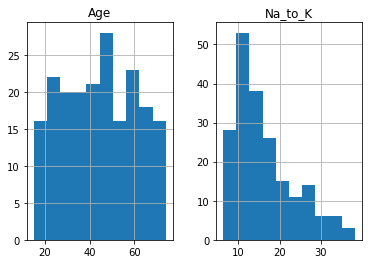

In [ ]:
data.hist()
plt.show()

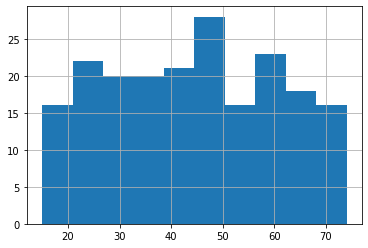

In [ ]:
data['Age'].hist()


In [ ]:
pdata= preprocessing.LabelEncoder()
pdata.fit(data['Sex'])
data['Sex'] = pdata.transform(data['Sex'])

pdata= preprocessing.LabelEncoder()
pdata.fit(data['BP'])
data['BP'] = pdata.transform(data['BP'])

pdata= preprocessing.LabelEncoder()
pdata.fit(data['Cholesterol'])
data['Cholesterol'] = pdata.transform(data['Cholesterol'])

In [ ]:
data.head()

Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  drugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0    7.798  drugX
4   61    0   1            0   18.043  drugY

In [ ]:
feature_df= data[data.columns[0:-2]]
X= np.asarray(feature_df)
y=np.asarray(data[data.columns[-1]])

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=3)

In [ ]:
dtree=DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=8, min_samples_split=2, random_state=2)
dtree_y_pred= dtree.fit(X_train, y_train).predict(X_test)
dtree_acc= accuracy_score(y_test, dtree_y_pred)
print("Accuracy of the Decision Tree Classifier: ", dtree_acc)
dtree_cm=confusion_matrix(y_test,dtree_y_pred)
print("Confusion Matrix of the Decision Tree Classifier: ", dtree_cm)
dtree_cr= classification_report(y_test, dtree_y_pred)
print('Classification report of the Decision tree classifier:', dtree_cr)
dtree_error=1-dtree_acc
print('Error:', dtree_error)

Accuracy of the Decision Tree Classifier:  0.625
Confusion Matrix of the Decision Tree Classifier:  [[ 2  0  0  0  2]
 [ 0  3  0  0  1]
 [ 0  0  2  0  2]
 [ 0  0  0 13  3]
 [ 1  2  1  3  5]]
Classification report of the Decision tree classifier:               precision    recall  f1-score   support

       drugA       0.67      0.50      0.57         4
       drugB       0.60      0.75      0.67         4
       drugC       0.67      0.50      0.57         4
       drugX       0.81      0.81      0.81        16
       drugY       0.38      0.42      0.40        12

    accuracy                           0.62        40
   macro avg       0.63      0.60      0.60        40
weighted avg       0.63      0.62      0.63        40

Error: 0.375
